# Intro

https://scikit-learn.org/stable/modules/calibration.html

In [1]:
from probatus.calibration import Calibrator
import numpy as np
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import calibration_curve
import pandas as pd

In [2]:
# Creating a dummy dataset
np.random.seed(42)
X, y = make_classification(n_samples=10000, n_features=10, n_informative=2, n_redundant=0, weights=[0.75,0.25])
X = pd.DataFrame(X)
y = pd.DataFrame(y)

n_train_samples = 9000

X_train, y_train = X[:n_train_samples], y[:n_train_samples]
X_test, y_test = X[n_train_samples:], y[n_train_samples:]

In [3]:
X_train.head(3)

,0,1,2,3,4,5,6,7,8,9
0,-1.210553,0.489124,-0.170607,0.678116,0.317374,0.223679,-2.648368,1.252575,0.788824,-0.043899
1,0.276602,-0.590667,0.662015,0.049810,-0.360608,-1.122170,-1.935954,0.094508,-0.743336,-1.466553
2,-0.432222,-0.422658,0.957586,-0.779766,0.509617,0.072764,-1.802808,1.509765,0.345242,1.656180


In [4]:
y_train.head(3)

,0
0,0
1,0
2,0


/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


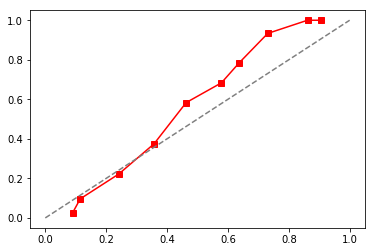

In [5]:
# Fitting a radom forest on the data and producing a callibration plot
clf_rf = RandomForestClassifier(max_depth=4)
clf_rf.fit(X_train, y_train)
y_test_predict_proba = clf_rf.predict_proba(X_test)[:, 1]
fraction_of_positives, mean_predicted_value = calibration_curve(y_test, y_test_predict_proba, n_bins=10)

plt.plot(mean_predicted_value, fraction_of_positives, 's-', color='red', label='Uncalibrated')
plt.plot([0, 1], [0, 1], '--', color='gray')

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


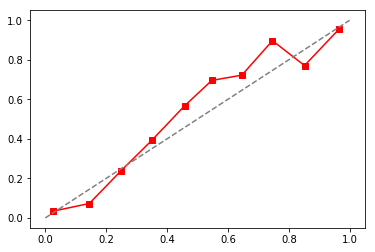

In [6]:
# Fitting a radom forest on the data and producing a callibration plot
clf_lg = LogisticRegression()
clf_lg.fit(X_train, y_train)
y_test_predict_proba = clf_lg.predict_proba(X_test)[:, 1]
fraction_of_positives, mean_predicted_value = calibration_curve(y_test, y_test_predict_proba, n_bins=10)

plt.plot(mean_predicted_value, fraction_of_positives, 's-', color='red', label='Uncalibrated')
plt.plot([0, 1], [0, 1], '--', color='gray')

# Callibrate Random Forest

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


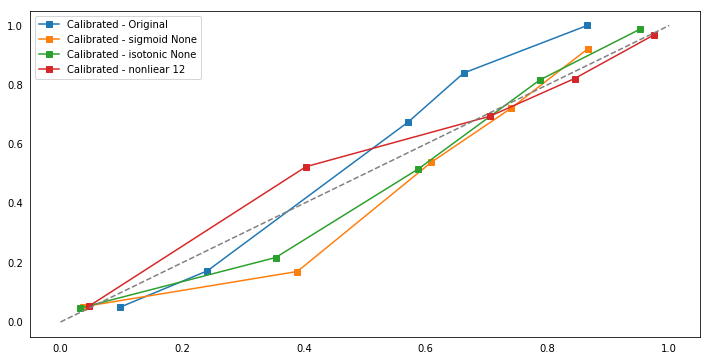

In [8]:
# Lets run the calibration for random forest
my_calibrator_rf = Calibrator({'sigmoid':None,'isotonic':None,'nonliear':12}, 3, 'agglomerative', 5)

# Fitting the calibrator on the data and the model
my_calibrator_rf.fit(clf_rf,X_train,X_test,y_test,y_train)

# Plotting the calibrated RF
my_calibrator_rf.plot()

In [9]:
# Extracting the calibrated probabilities
my_calibrator_rf.score('isotonic',X_test,clf_rf)[:,1]

array([0.7817524 , 0.03793999, 0.40538191, 0.03245902, 0.7817524 ,
       0.97910921, 0.46331225, 0.01263954, 0.33256778, 0.02317691,
       0.02251894, 0.0717608 , 0.01263954, 0.02251894, 0.02251894,
       0.01646092, 0.02251894, 0.01646092, 0.02251894, 0.02251894,
       0.83323456, 0.02387162, 0.74670662, 0.02251894, 0.02163639,
       0.28904539, 0.96492481, 0.62872623, 0.02251894, 0.91359197,
       0.01210906, 0.02251894, 0.03292136, 0.01280377, 0.91788472,
       0.02251894, 0.01145109, 0.03934423, 0.67679864, 0.02251894,
       0.83308525, 0.9041659 , 0.07525543, 0.02251894, 0.02863764,
       0.01263954, 0.02251894, 0.02251894, 0.03245902, 0.13407896,
       0.72008526, 0.79712679, 0.02251894, 0.02251894, 0.01263954,
       0.02251894, 0.48353536, 0.0371107 , 0.40538191, 0.02251894,
       0.79945972, 0.85336685, 0.33256778, 0.03245902, 0.37982274,
       0.01665039, 0.85336685, 0.02827638, 0.01527246, 0.11268354,
       0.02251894, 0.02251894, 0.01263954, 0.02251894, 0.01908

In [10]:
# Extracting the dictionary with all calibrators
my_calibrator_rf.get_calibs()

{'sigmoid': CalibratedClassifierCV(base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=4, max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
             oob_score=False, random_state=None, verbose=0,
             warm_start=False),
             cv=3, method='sigmoid'),
 'isotonic': CalibratedClassifierCV(base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=4, max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
             oob_score=False, random_state=None, verbose=0,
             warm_start=False),
     

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


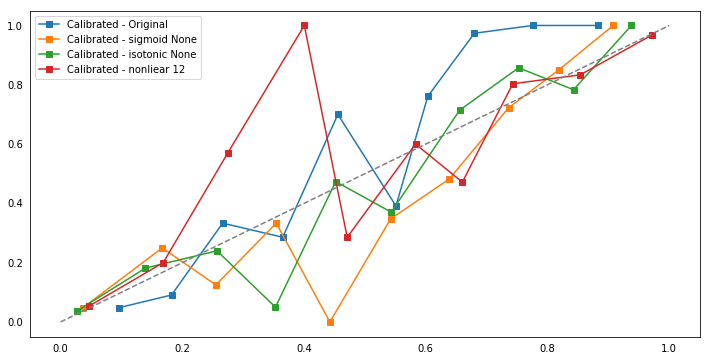

In [11]:
# Lets run the calibration for random forest
my_calibrator_rf = Calibrator({'sigmoid':None,'isotonic':None,'nonliear':12}, 3, 'simple', 10)

# Fitting the calibrator on the data and the model
my_calibrator_rf.fit(clf_rf,X_train,X_test,y_test,y_train)

# Plotting the calibrated RF
my_calibrator_rf.plot()

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


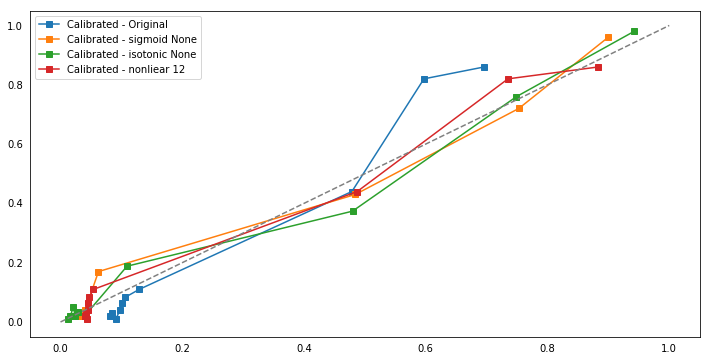

In [12]:
# Lets run the calibration for random forest
my_calibrator_rf = Calibrator({'sigmoid':None,'isotonic':None,'nonliear':12}, 3, 'quantile', 10)

# Fitting the calibrator on the data and the model
my_calibrator_rf.fit(clf_rf,X_train,X_test,y_test,y_train)

# Plotting the calibrated RF
my_calibrator_rf.plot()